In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.pyplot import cm


In [49]:
!unzip drive/MyDrive/Pedestrian_Trajectories.zip

Archive:  drive/MyDrive/Pedestrian_Trajectories.zip
replace Bottleneck_Data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
 extracting: Bottleneck_Data.zip     
replace Corridor_Data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Corridor_Data.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: Corridor_Data.zip       


In [50]:
!unzip ./Bottleneck_Data.zip

Archive:  ./Bottleneck_Data.zip
replace uo-180-070.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: uo-180-070.txt          
  inflating: uo-180-095.txt          
  inflating: uo-180-120.txt          
  inflating: uo-180-180.txt          


In [51]:
!unzip ./Corridor_Data.zip

Archive:  ./Corridor_Data.zip
replace ug-180-015.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ug-180-015.txt          
  inflating: ug-180-030.txt          
  inflating: ug-180-060.txt          
  inflating: ug-180-085.txt          
  inflating: ug-180-095.txt          
  inflating: ug-180-110.txt          
  inflating: ug-180-140.txt          
  inflating: ug-180-230.txt          


In [52]:
columns = ["ID", "FRAME", "X", "Y", "Z"]
bottleneck = pd.read_csv("uo-180-070.txt", sep=" ", header=None)
corridor = pd.read_csv("ug-180-015.txt", sep=" ", header=None)

bottleneck.columns = columns
corridor.columns = columns

In [53]:
bottleneck.head()

,ID,FRAME,X,Y,Z
0,1,218,129.748,787.177,155.467
1,1,219,130.771,772.562,155.467
2,1,220,132.569,758.186,155.467
3,1,221,134.659,745.493,155.467
4,1,222,134.878,734.659,155.467


In [54]:
corridor.head()

,ID,FRAME,X,Y,Z
0,1,0,40.2700,493.493,171.988
1,1,1,40.3320,493.513,171.988
2,1,2,40.3451,493.512,171.988
3,1,3,40.3600,493.505,171.988
4,1,4,40.3612,493.509,171.988


First we would like to show the movement for each pedestrian within the ***Bottleneck Scenario***

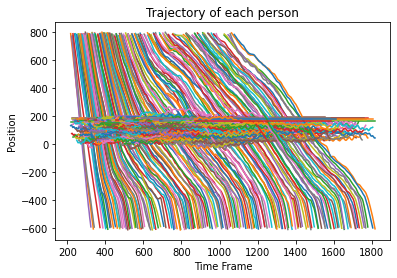

In [55]:
ids = bottleneck["ID"].unique()

# group the data by person
grouped = bottleneck.groupby("ID")

# create a figure and axis
fig, ax = plt.subplots()

# loop through each group
for name, group in grouped:
    ax.plot(group["FRAME"], group["X"], label=name)
    ax.plot(group["FRAME"], group["Y"], label=name)
    ax.plot(group["FRAME"], group["Z"], label=name)

# add a legend

# set the title and axis labels
ax.set_title("Trajectory of each person")
ax.set_xlabel("Time Frame")
ax.set_ylabel("Position")

# show the plot
plt.show()

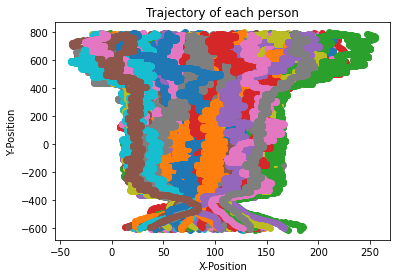

In [56]:
# create a figure and axis
fig, ax = plt.subplots()

# loop through each group
for name, group in grouped:
    ax.scatter(group["X"], group["Y"], label=name)


# set the title and axis labels
ax.set_title("Trajectory of each person")
ax.set_xlabel("X-Position")
ax.set_ylabel("Y-Position")

# show the plot
plt.show()

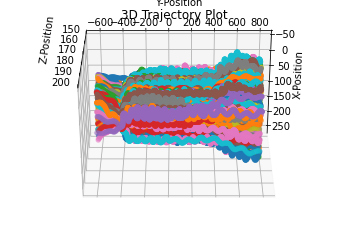

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop through each person in the dataframe and plot their position data as a scatter plot
for person in bottleneck["ID"].unique():
    person_df = bottleneck[bottleneck["ID"] == person]
    ax.scatter(person_df["X"], person_df["Y"], person_df["Z"], label=person)

# Add labels and title to the plot
ax.set_xlabel("X-Position")
ax.set_ylabel("Y-Position")
ax.set_zlabel("Z-Position")
ax.view_init(120, 0)
plt.title("3D Trajectory Plot")

# Show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


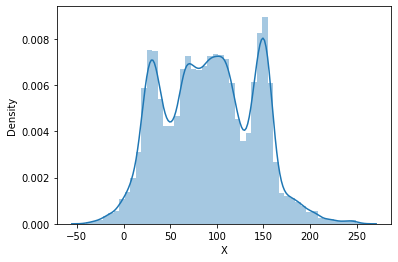

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


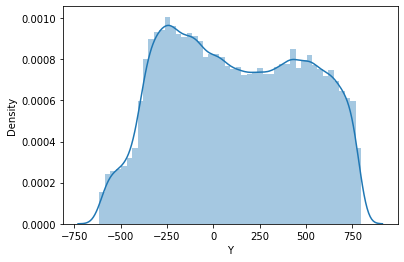

Number of data points:  75336


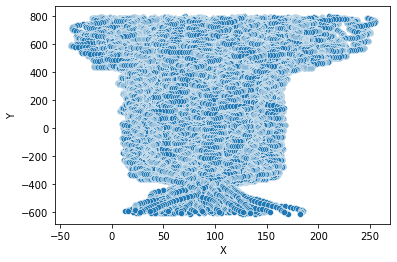

In [58]:
# Distribution of the data
sns.distplot(bottleneck['X'])
plt.show()
sns.distplot(bottleneck['Y'])
plt.show()

# Number of data points
print("Number of data points: ", bottleneck.shape[0])

# Presence of non-linear relationships
sns.scatterplot(x='X', y='Y', data=bottleneck)
plt.show()

Now we do the same for the ***Corridor Scenario***

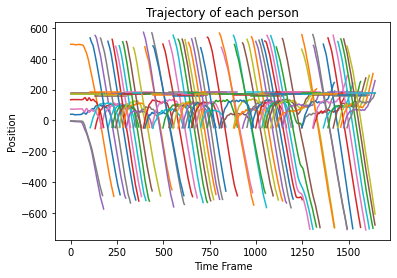

In [59]:
ids = corridor["ID"].unique()

# group the data by person
grouped = corridor.groupby("ID")

# create a figure and axis
fig, ax = plt.subplots()

# loop through each group
for name, group in grouped:
    ax.plot(group["FRAME"], group["X"], label=name)
    ax.plot(group["FRAME"], group["Y"], label=name)
    ax.plot(group["FRAME"], group["Z"], label=name)

# add a legend

# set the title and axis labels
ax.set_title("Trajectory of each person")
ax.set_xlabel("Time Frame")
ax.set_ylabel("Position")

# show the plot
plt.show()

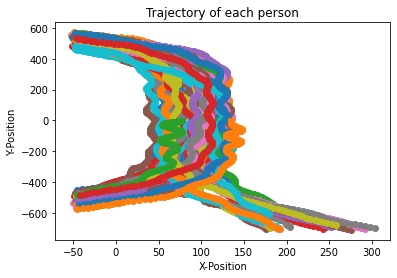

In [60]:
fig, ax = plt.subplots()

# loop through each group
for name, group in grouped:
    ax.scatter(group["X"], group["Y"], label=name)


# set the title and axis labels
ax.set_title("Trajectory of each person")
ax.set_xlabel("X-Position")
ax.set_ylabel("Y-Position")

# show the plot
plt.show()

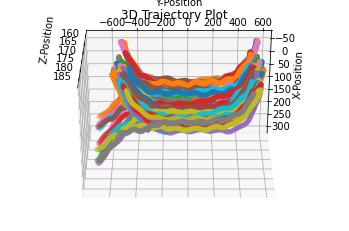

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Loop through each person in the dataframe and plot their position data as a scatter plot
for person in corridor["ID"].unique():
    person_df = corridor[corridor["ID"] == person]
    ax.scatter(person_df["X"], person_df["Y"], person_df["Z"], label=person)

# Add labels and title to the plot
ax.set_xlabel("X-Position")
ax.set_ylabel("Y-Position")
ax.set_zlabel("Z-Position")
ax.view_init(120, 0)
plt.title("3D Trajectory Plot")

# Show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


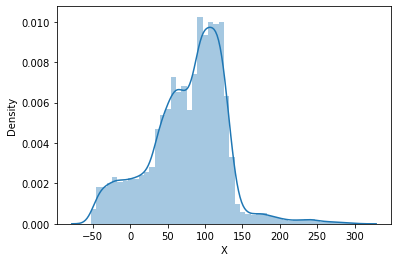

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


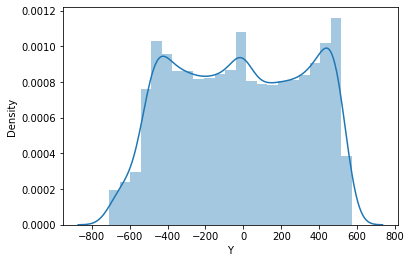

Number of data points:  9158


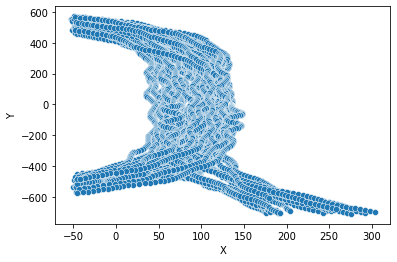

In [62]:
# Distribution of the data
sns.distplot(corridor['X'])
plt.show()
sns.distplot(corridor['Y'])
plt.show()

# Number of data points
print("Number of data points: ", corridor.shape[0])

# Presence of non-linear relationships
sns.scatterplot(x='X', y='Y', data=corridor)
plt.show()